In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df

In [ ]:
df.columns.tolist()

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
print(df['Churn'].groupby(df['Churn']).count())

sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
percentages = df['Churn'].value_counts(normalize=True)*100
print(percentages)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
df['TotalCharges'] = df['MonthlyCharges'] * df['tenure']
df

In [ ]:
labelencoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    df[col] = labelencoder.fit_transform(df[col])

df.info()

In [ ]:
df['customerID']=df['customerID'].str.split('-').str[0].astype(int)
df['customerID']

In [ ]:
X_test.shape, y_test.shape

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

In [ ]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind="bar")
plt.title("Top Features Driving Churn")
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn by Contract Type")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30, palette="coolwarm")
plt.title("Churn Distribution by Tenure")
plt.show()

In [ ]:
# Tenure bins
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], 
                            labels=["0-12", "13-24", "25-48", "49-72"])

sns.countplot(x='tenure_group', hue='Churn', data=df, palette="coolwarm")
plt.title("Churn by Tenure Groups")
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\Welcome\AppData\Local\Temp\ipykernel_14840\264077309.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Revenue', data=df, palette="coolwarm")


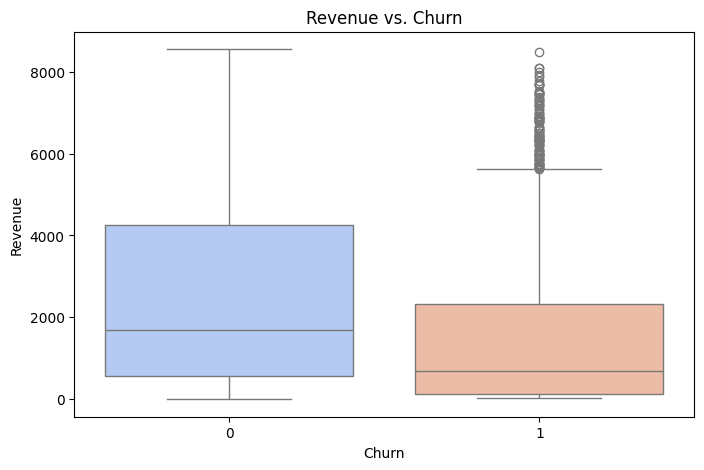

In [166]:
df['Revenue'] = df['MonthlyCharges'] * df['tenure']

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Revenue', data=df, palette="coolwarm")
plt.title("Revenue vs. Churn")
plt.show()
